In [1]:
import pandas as pd
import numpy as np
from numpy.random import randint
from random import random as rnd
from random import gauss, randrange
import random
from sklearn import preprocessing
import heapq
import matplotlib.pyplot as plt

# Read the data set(RestaurantMenu)

In [2]:
menu= pd.read_csv('RestaurantMenu.csv',encoding= 'unicode_escape')
menu.drop(['Unnamed: 0'], axis=1, inplace=True)

menu.head(60)

,CATEGORY,ITEM,CALORIES,TYPE,PRICE,ID
0,STARTER,Dynamite shrimp,770.0,Vegetarian,74,1
1,STARTER,Halloumi fries,530.0,Vegetarian,48,2
2,STARTER,Baked eggplant,270.0,Vegan,36,3
3,STARTER,Fish cake,480.0,Vegetarian,60,4
4,STARTER,Lentil soup,290.0,Vegan,26,5
5,STARTER,Chicken soup,280.0,Regular,32,6
6,STARTER,Lamb samosa,650.0,Regular,52,7
7,STARTER,Kale salad,280.0,Vegan,38,8
8,STARTER,Quinoa salad,320.0,Vegan,36,9
9,STARTER,Burrata salad,360.0,Vegetarian,65,10


In [3]:
STARTER = []
MAIN  = []
DESSERT = []
HOT = []
COLD = []
i=0
while(i<len(menu)):
    if(menu['CATEGORY'][i]=='STARTER'):
        STARTER.append(i)
        
    elif(menu['CATEGORY'][i]=='MAIN COURSE'):
        MAIN.append(i)    
        
    elif(menu['CATEGORY'][i]=='DESSERT'):
        DESSERT.append(i)
        
    elif(menu['CATEGORY'][i]=='HOT DRINK'):
        HOT.append(i)
    else:
        COLD.append(i)
    
    i+=1

categories= [STARTER,MAIN,DESSERT,HOT,COLD]
print(STARTER)
print(MAIN)
print(DESSERT)
print(HOT)
print(COLD)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
[48, 49, 50, 51, 52, 53, 54, 55]
[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]


طلعنا اعلى سعر وسعرات عشان نعرف عدد خاناتهم ونقسم عليها بحيث ما يتعدا اي ناتج يطلع بعدين عن الواحد 

In [4]:
maxMeals =menu.groupby('CATEGORY').max()
highestPriceMeal = maxMeals['PRICE'].sum()
highestCaloriesMeal= maxMeals['CALORIES'].sum()
print('The meal price (that has highest price):', highestPriceMeal)
print('The meal calories (that has highest calories):', highestCaloriesMeal)

The meal price (that has highest price): 323
The meal calories (that has highest calories): 4450.0


# Reading the input from the user

# Step1 - initialize population

In [5]:
print("☁☁☁☁ Welcome to Al-Sahab Restaurant! ☁☁☁☁ ") 
  
userType = input("Enter the item type: ") 
while (userType!='Vegetarian' and userType!='vegetarian' and userType!='Vegan' and userType!='vegan' and userType!='Regular' and userType!='regular' ):
    userType = input("Please enter one of the following types only(Vegan,Vegetarian,Regular): ") 
    
    
userCalories = int(input("Enter the calories: "))
while(userCalories<0 ):
    userCalories =int( input("Please enter the correct calories: ") )
    
userBudget = int(input("Enter your budget: "))
while(userBudget<0):
    userBudget =int( input("Please enter the correct budget): ") )


☁☁☁☁ Welcome to Al-Sahab Restaurant! ☁☁☁☁ 
Enter the item type: Regular
Enter the calories: 500
Enter your budget: 500


# Combination----1----(psize=90,crossover_rate=0.92, mutation_rate=0.2)  

best Fitness= 0.266788
best Meal= [0, 22, -47, -52, -66]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Chicken Parmesan Sandwich      2050.0      87      Regular
There is no 
There is no 
There is no 

totalPri= 161
tatalCal= 2820.0


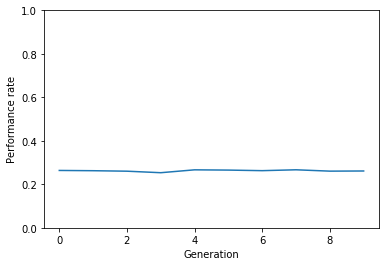

In [38]:
##--------------------------------------------------------------The valus
psize=90
crossover_rate=0.9
mutation_rate=0.2

##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----2----(psize=90,crossover_rate=0.92, mutation_rate=0.05)  

best Fitness= 0.26940000000000003
best Meal= [0, 16, -42, -52, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Fried Shrimp      2050.0      103      Regular
There is no 
There is no 
There is no 

totalPri= 177
tatalCal= 2820.0


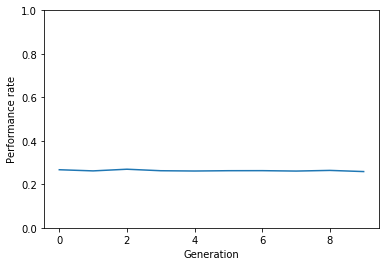

In [39]:
##--------------------------------------------------------------The valus
psize=90
crossover_rate=0.92
mutation_rate=0.05

##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----3----(psize=90,crossover_rate=0.92, mutation_rate=0.12)  

best Fitness= 0.27676
best Meal= [0, 15, -44, -55, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Fish & Chips      2000.0      100      Regular
There is no 
There is no 
There is no 

totalPri= 174
tatalCal= 2770.0


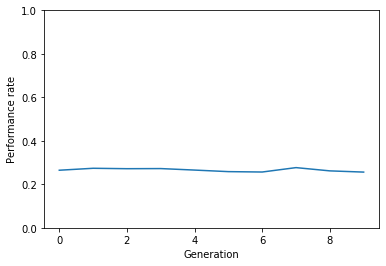

In [40]:
##--------------------------------------------------------------The valus
psize=90
crossover_rate=0.92
mutation_rate=0.12

##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----4----(psize=90,crossover_rate=0.75, mutation_rate=0.2)  

best Fitness= 0.2762
best Meal= [0, 16, -47, -52, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Fried Shrimp      2050.0      103      Regular
There is no 
There is no 
There is no 

totalPri= 177
tatalCal= 2820.0


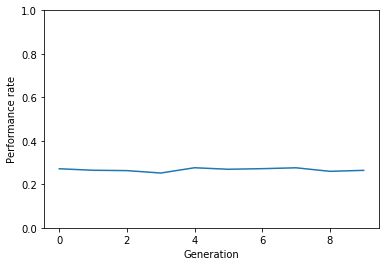

In [58]:
##--------------------------------------------------------------The valus
psize=90
crossover_rate=0.75
mutation_rate=0.2

##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----5----(psize=90,crossover_rate=0.75, mutation_rate=0.05)  

In [517]:
##--------------------------------------------------------------The valus
psize=90
crossover_rate=0.75
mutation_rate=0.05

##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----6----(psize=90,crossover_rate=0.75, mutation_rate=0.12)  

In [518]:
##--------------------------------------------------------------The valus
psize=90
crossover_rate=0.75
mutation_rate=0.12

##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----7----(psize=90,crossover_rate=0.6, mutation_rate=0.2)  

In [519]:
##--------------------------------------------------------------The valus
psize=90
crossover_rate=0.6
mutation_rate=0.2

##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----8----(psize=90,crossover_rate=0.6, mutation_rate=0.05)  

In [520]:
##--------------------------------------------------------------The valus
psize=90
crossover_rate=0.6
mutation_rate=0.05
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----9----(psize=90,crossover_rate=0.6, mutation_rate=0.12)  

In [521]:
##--------------------------------------------------------------The valus
psize=90
crossover_rate=0.6
mutation_rate=0.12
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()


# Combination----10----(psize=120,crossover_rate=0.92, mutation_rate=0.2)  

In [ ]:
##--------------------------------------------------------------The valus
psize=120
crossover_rate=0.92
mutation_rate=0.2
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----11----(psize=120,crossover_rate=0.92, mutation_rate=0.5)  

In [ ]:
##--------------------------------------------------------------The valus
psize=120
crossover_rate=0.92
mutation_rate=0.05
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----12----(psize=120,crossover_rate=0.92, mutation_rate=0.12)  

In [ ]:
##--------------------------------------------------------------The valus
psize=120
crossover_rate=0.92
mutation_rate=0.12
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----13----(psize=120,crossover_rate=0.75, mutation_rate=0.2)  

In [ ]:
##--------------------------------------------------------------The valus
psize=120
crossover_rate=0.75
mutation_rate=0.2
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----14----(psize=120,crossover_rate=0.75, mutation_rate=0.05)  

In [ ]:
##--------------------------------------------------------------The valus
psize=120
crossover_rate=0.75
mutation_rate=0.05
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----15----(psize=120,crossover_rate=0.75, mutation_rate=0.12)  

In [ ]:
##--------------------------------------------------------------The valus
psize=120
crossover_rate=0.75
mutation_rate=0.12
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----16----(psize=120,crossover_rate=0.6, mutation_rate=0.2)  

best Fitness= 0.2786
best Meal= [0, 16, -47, -55, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Fried Shrimp      2050.0      103      Regular
There is no 
There is no 
There is no 

totalPri= 177
tatalCal= 2820.0


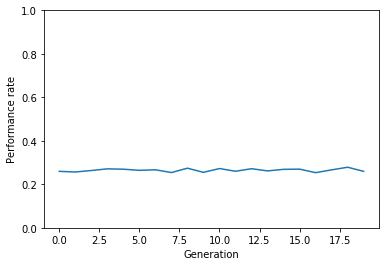

In [57]:
##--------------------------------------------------------------The valus
psize=120
crossover_rate=0.6
mutation_rate=0.2
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----17----(psize=120,crossover_rate=0.6, mutation_rate=0.05)  

best Fitness= 0.27896000000000004
best Meal= [0, 16, -44, -55, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Fried Shrimp      2050.0      103      Regular
There is no 
There is no 
There is no 

totalPri= 177
tatalCal= 2820.0


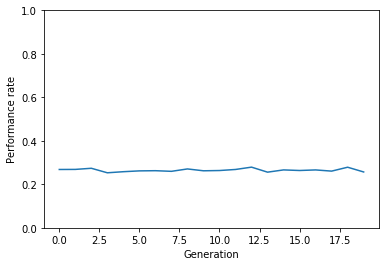

In [56]:
##--------------------------------------------------------------The valus
psize=120
crossover_rate=0.6
mutation_rate=0.05
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----18----(psize=120,crossover_rate=0.6, mutation_rate=0.12)  

best Fitness= 0.2722
best Meal= [0, 22, -47, -55, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Chicken Parmesan Sandwich      2050.0      87      Regular
There is no 
There is no 
There is no 

totalPri= 161
tatalCal= 2820.0


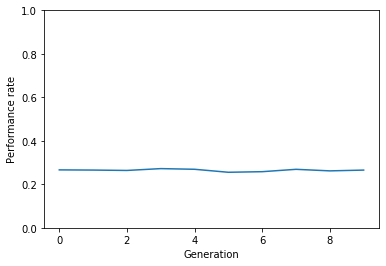

In [50]:
##--------------------------------------------------------------The valus
psize=120
crossover_rate=0.6
mutation_rate=0.12
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----19----(psize=150,crossover_rate=0.92, mutation_rate=0.2)  

best Fitness= 0.2786
best Meal= [0, 16, -47, -55, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Fried Shrimp      2050.0      103      Regular
There is no 
There is no 
There is no 

totalPri= 177
tatalCal= 2820.0


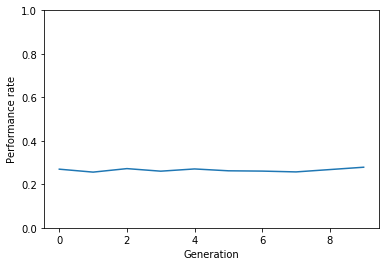

In [49]:
##--------------------------------------------------------------The valus
psize=150
crossover_rate=0.92
mutation_rate=0.2
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----20----(psize=150,crossover_rate=0.92, mutation_rate=0.05)  

best Fitness= 0.265568
best Meal= [0, 16, -47, -49, -66]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Fried Shrimp      2050.0      103      Regular
There is no 
There is no 
There is no 

totalPri= 177
tatalCal= 2820.0


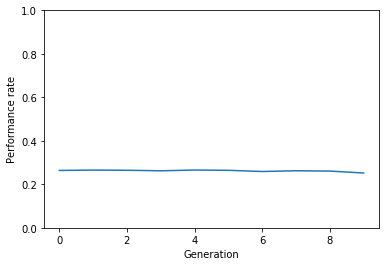

In [48]:
##--------------------------------------------------------------The valus
psize=150
crossover_rate=0.92
mutation_rate=0.05
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----21----(psize=150,crossover_rate=0.92, mutation_rate=0.12)  

best Fitness= 0.27076
best Meal= [0, -27, -44, -51, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
There is no 
There is no 
There is no 
There is no 

totalPri= 74
tatalCal= 770.0


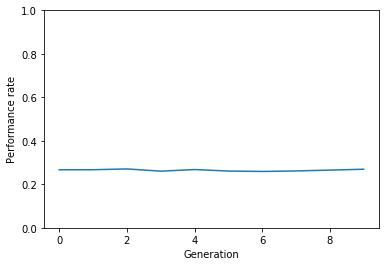

In [47]:
##--------------------------------------------------------------The valus
psize=150
crossover_rate=0.92
mutation_rate=0.12
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show()

# Combination----22----(psize=150,crossover_rate=0.75, mutation_rate=0.2)  

best Fitness= 0.27436000000000005
best Meal= [0, 15, -44, -52, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Fish & Chips      2000.0      100      Regular
There is no 
There is no 
There is no 

totalPri= 174
tatalCal= 2770.0


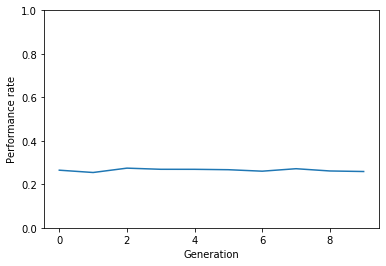

In [46]:
##--------------------------------------------------------------The valus
psize=150
crossover_rate=0.75
mutation_rate=0.2
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show() 

# Combination----23----(psize=150,crossover_rate=0.75, mutation_rate=0.05)  

best Fitness= 0.2764
best Meal= [0, 15, -47, -55, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Fish & Chips      2000.0      100      Regular
There is no 
There is no 
There is no 

totalPri= 174
tatalCal= 2770.0


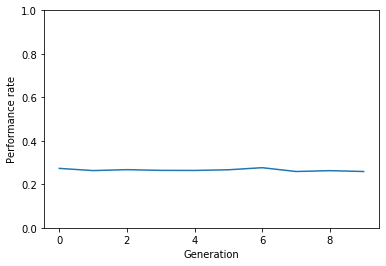

In [45]:
##--------------------------------------------------------------The valus
psize=150
crossover_rate=0.75
mutation_rate=0.05
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show() 

# Combination----24----(psize=150,crossover_rate=0.75, mutation_rate=0.12)  

best Fitness= 0.27896000000000004
best Meal= [0, 16, -44, -55, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Fried Shrimp      2050.0      103      Regular
There is no 
There is no 
There is no 

totalPri= 177
tatalCal= 2820.0


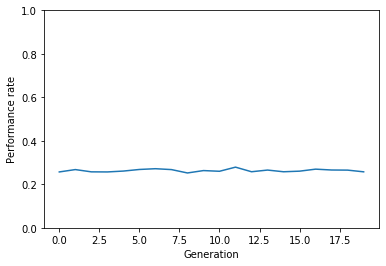

In [55]:
##--------------------------------------------------------------The valus
psize=150
crossover_rate=0.75
mutation_rate=0.12
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show() 

# Combination----25----(psize=150,crossover_rate=0.6, mutation_rate=0.2)  

best Fitness= 0.27196
best Meal= [0, 16, -44, -52, -61]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Fried Shrimp      2050.0      103      Regular
There is no 
There is no 
There is no 

totalPri= 177
tatalCal= 2820.0


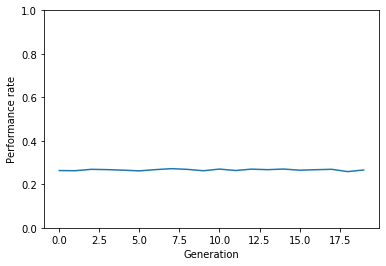

In [54]:
##--------------------------------------------------------------The valus
psize=150
crossover_rate=0.6
mutation_rate=0.2
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show() 

# Combination----26----(psize=150,crossover_rate=0.6, mutation_rate=0.05)  

best Fitness= 0.27896000000000004
best Meal= [0, 16, -44, -55, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
2 -  Fried Shrimp      2050.0      103      Regular
There is no 
There is no 
There is no 

totalPri= 177
tatalCal= 2820.0


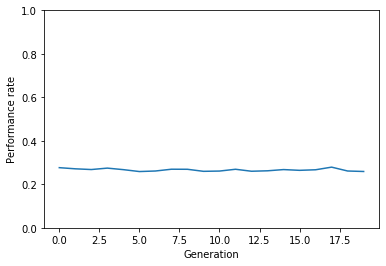

In [53]:
##--------------------------------------------------------------The valus
psize=150
crossover_rate=0.6
mutation_rate=0.05
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show() 

# Combination----27----(psize=150,crossover_rate=0.6, mutation_rate=0.12)  

best Fitness= 0.27476000000000006
best Meal= [0, -27, -44, -55, -62]
Your mael from:
1 -  Dynamite shrimp      770.0      74      Vegetarian
There is no 
There is no 
There is no 
There is no 

totalPri= 74
tatalCal= 770.0


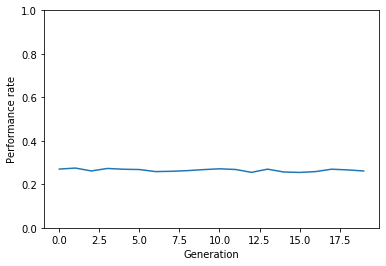

In [52]:
##--------------------------------------------------------------The valus
psize=150
crossover_rate=0.6
mutation_rate=0.12
##--------------------------------------------------------------Genetic Algorith
BestFitness=[]
BestMeals= []
Generation=[]

for j in range(20):
    population1= population(psize)
    dfFitness = calFitnessdf(population1)
    i=0
    while(i<20):#----------------------------> Termination condition
        offspring = crossover(dfFitness, crossover_rate) 
        offspring = mutation(offspring, mutation_rate) 
        offspring = replacement(population1, offspring, psize)
        i+=1
        

    BestFitness.append(bestF(offspring))
    BestMeals.append(bestM(offspring))
    Generation.append(j)

##--------------------------------------------------------------Best Meal info


bestMeal= bestM(BestMeals)
bestFitness= max(BestFitness)

print("best Fitness=",bestFitness)
print("best Meal=",bestMeal)    
print("Your mael from:")
totalPri=0
totalCal= 0
for i in range(len(bestMeal)):
    #print(menu['ITEM'][bestMeal[i]],)
    if(bestMeal[i]<0):
        print('There is no ')
    else:
        totalPri+= menu['PRICE'][bestMeal[i]]
        totalCal+= menu['CALORIES'][bestMeal[i]]
        print(i+1,"- ",menu['ITEM'][bestMeal[i]],"    ",menu['CALORIES'][bestMeal[i]],"    ",menu['PRICE'][bestMeal[i]],"    " ,menu['TYPE'][bestMeal[i]])

print("")
print("totalPri=",totalPri)
print("tatalCal=",totalCal)


##--------------------------------------------------------------Plot
plt.plot(Generation, BestFitness)
plt.ylim((0,1))
plt.xlabel("Generation")
plt.ylabel("Performance rate")
plt.show() 

# Functions

In [6]:
def population( number_of_individuals):
    return [individual() 
        for x in range(number_of_individuals)]

In [7]:
def individual():
    individual=[]
    individual.append(random.choice(STARTER) )
    individual.append(random.choice(MAIN) )
    individual.append(random.choice(DESSERT) )
    individual.append(random.choice(HOT) )
    individual.append(random.choice(COLD) )
    
    return individual 

In [8]:
def calFitnessdf(population):
    meals = pd.DataFrame(columns=['items', 'fitness'])
    meals['items']= population
    p= menu['PRICE']
    c= menu['CALORIES']
    t= menu['TYPE']
    i=0
    while(i<len(meals)):
        m= meals['items'][i]
        meals['fitness'][i]= calFitness(m)
        i+=1
    return meals

In [9]:
def calFitness(meal):  
    p= menu['PRICE']
    c= menu['CALORIES']
    t= menu['TYPE']
    
    m= meal
    sum_type= 0
    sum_price= userBudget
    sum_calories= userCalories
    j=0
    
    
    while(j<len(m)):
        m[j]=m[j]*-1 if m[j]<0 else m[j]
        index= m[j]
        
        if(userType=='Vegan'):
            if(t[index]=='Vegan'):
                sum_type+= 10
            else:
                sum_type+= 0
                m[j]=m[j]*-1 if m[j]>0 else m[j]
        if(userType=='Vegetarian'):
            if(t[index]=='Vegan' or t[index]=='Vegetarian' ):
                sum_type+= 10
            else:
                sum_type+= 0
            
        if(userType=='Regular'):
                sum_type+= 10

                
            
           
        sum_price-= p[index]
        if(sum_price<0):
            m[j]=m[j]*-1 if m[j]>0 else m[j]
            
        sum_calories-= c[index]
        if(sum_calories<0):
            m[j]=m[j]*-1 if m[j]>0 else m[j]               
        
        j+=1

    tf=  (sum_type)*(10**-2)
    
    pf=  (sum_price)*10**-3
    if (pf<0):
        pf= abs(pf)
        
    cf=  abs((sum_calories)*10**-4)
    if (cf<0):
        cf= abs(cf)
    
    fitnes=  0.4*((pf)) + 0.4*(tf) + 0.2*((cf))

    return fitnes

In [10]:
def Roulette(n,mealsDf):
    Selections=[]
    i=0
    while(i<n):
        s = Selection(mealsDf)
        if(s not in Selections):
            Selections.append(s)
            i+=1
    return Selections[0], Selections[1]
    

def Selection(mealsDf):
    r = random.random()
    pSum = 0
    i=0
    while(i<len(mealsDf)):
        pSum= pSum+ mealsDf['fitness'][i]
        if(pSum>=r):
            return(mealsDf['items'][i])
        i+=1    

In [11]:

def crossover(population, crossover_rate):
    old = population
    crossover_size = int(len(old) * crossover_rate)

    new_genes = []
    
    for i in range(0, crossover_size):
        [parent1, parent2] = Roulette(2,old)
        crossover_point = random.randint(1, 5-1)
        c1 = parent1[:crossover_point]
        c1.extend(parent2[crossover_point:])
        c2 = parent2[:crossover_point]
        c2.extend(parent1[crossover_point:])

        new_gen= [c1,c2]
        new_genes.extend(new_gen)
        
    
    return new_genes
  

In [12]:
def mutation(popmeals, mutation_rate ): 
    new_meals_population = [] 
    
    for meal in popmeals:
        m = random.random()
        if m >= mutation_rate:##############################################################################################
            m_ind = random.randint(0, len(meal) - 1) 
            meal[m_ind] = random.choice(categories[m_ind])
        new_meals_population.append(meal) 
    return new_meals_population

In [13]:
def replacement(population, new_genes, pSize):
    population.extend(new_genes)
    fit=[]
    for meal in population:
        fit.append(calFitness(meal))
    
    new_meals_population =[]
    
    best =heapq.nlargest(pSize, fit)
    
    for i in range(len(fit)):
        if(fit[i] in best):
            new_meals_population.append(population[i])
    
    return new_meals_population

In [14]:
def bestF(offspring):
    offspring = calFitnessdf(offspring)
    bestFitness= offspring['fitness'].max()
    
    return bestFitness

In [15]:
def bestM(offspring):
    offspring = calFitnessdf(offspring)
    bestFitness= offspring['fitness'].max()
    ind= offspring[offspring['fitness']==bestFitness].index[0]
    bestMeal = offspring['items'][ind]
    
    return bestMeal